# 1. Importing libries. 

In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from dateutil import parser

In [48]:
df = pd.read_csv('appdata10.csv')

In [49]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [50]:
df.shape

(50000, 12)

In [51]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [52]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


# 2. Data cleaning 

In [53]:
df.hour

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

In [56]:
# Converting the hour columsfrom object to str, it will also enable it to appear in the describe function 
df.hour=df.hour.str.slice(1, 3).astype(int)

In [60]:
# dropping unwanted varibales 1. user 2. screenlist 3. enrolled data 4. first open  5. enrolled 
df2 = df.drop(['user','enrolled','enrolled_date', 'first_open','screen_list'], axis=1) 

In [61]:
df2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


## 3. EDA

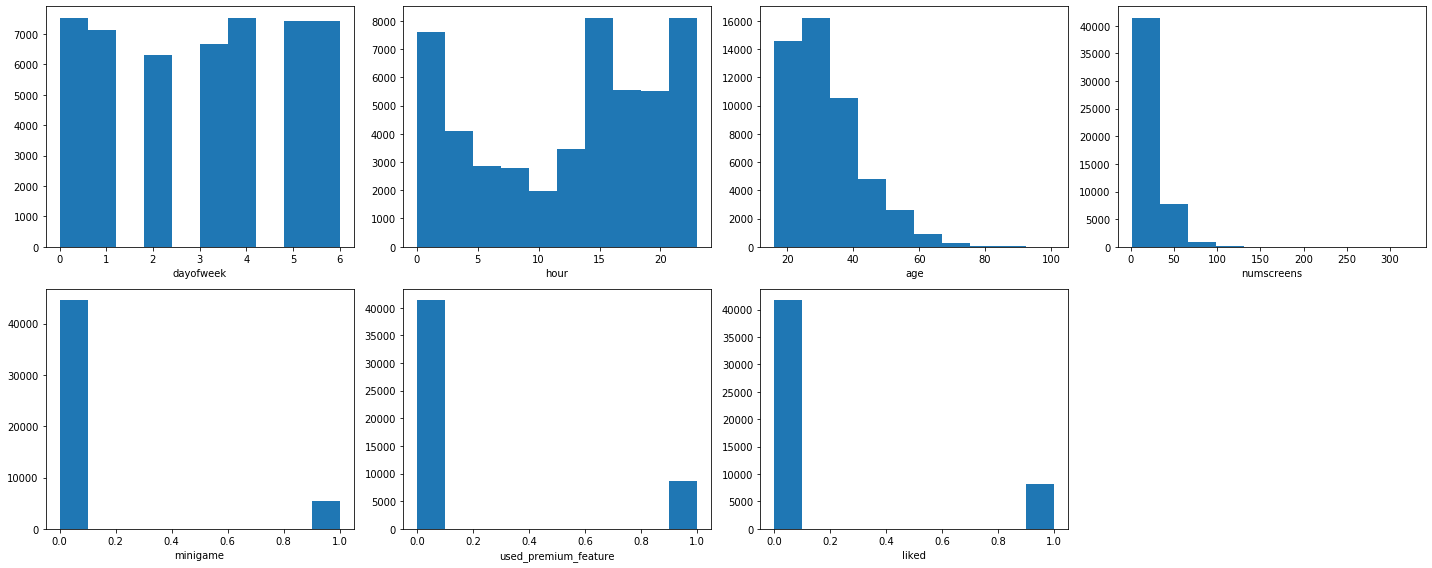

In [64]:
num_cols = df2.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(2,4,col+1)
    plt.hist(num_cols.iloc[:,col])
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()

### 1. days of the week has an even distribution
### 2. hours people tend to use the App more between 0-3:00 and between 14:00 and 24:00
### 3. Most users of the App are between the age of 15-40
### 4. Most people dont have minigame. about 5000 have minigame and 50,000 dont have which correlates to the behavours of premium users and users that Liked 



In [66]:
df2.corrwith(df.enrolled)

dayofweek               0.011326
hour                   -0.066694
age                    -0.131303
numscreens              0.209457
minigame                0.104979
used_premium_feature   -0.052703
liked                  -0.007022
dtype: float64

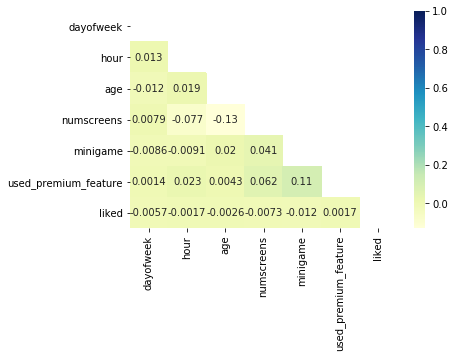

In [79]:
#Correlations of the datasets
corr = df2.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df2.corr(), annot=True , mask=mask, cmap="YlGnBu")

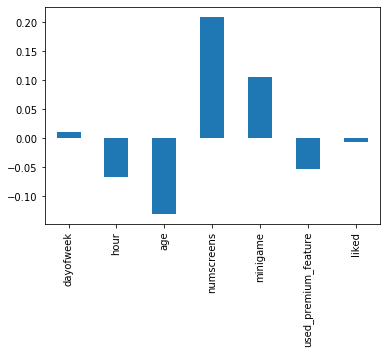

In [70]:
# correlation with the Y variable i.e enrolled 
df2.corrwith(df.enrolled).plot.bar()

# 4. Model building and feature engineering 

In [84]:
df['first_open']=[parser.parse(row_data) for row_data in df['first_open']]

In [86]:
df['enrolled_date']=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in df['enrolled_date']]

In [87]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [88]:
df['difference']=(df.enrolled_date - df.first_open).astype('timedelta64[h]')

In [89]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


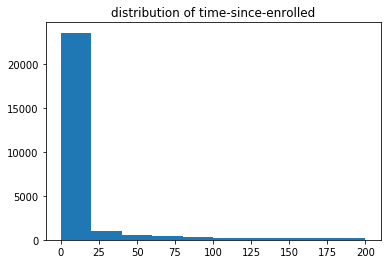

In [94]:
plt.hist(df['difference'].dropna(), range =[0,200])
plt.title('distribution of time-since-enrolled')
plt.show()

### majority of the people enrolled in the first 50 hours spent on the App which is approximatly the 48 hours
### we will convert all the users that spent less then 48 hours on the App to 1 and else 0

In [96]:
df.loc[df.difference > 48, 'enrolled'] =0

In [98]:
df.drop(['difference', 'enrolled_date','first_open'], axis=1, inplace=True)

In [99]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [109]:
# engeneering the screen_list screen 
# using encoding of the will enlarge the numbers of colums we have which make make loss track. we have another csv files that shows the 50 most important screen 
ts= pd.read_csv('top_screens.csv').top_screens.values
df['screen_list']=df.screen_list.astype(str) + ','
for sc in ts:
    df[sc]=df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+ "," , "")
df['other']=df.screen_list.str.count(',')
df=df.drop(['screen_list'],axis=1)

In [111]:
df.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,9
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,12


In [113]:
df.shape

(50000, 68)